<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#R与Python共用" data-toc-modified-id="R与Python共用-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>R与Python共用</a></span></li><li><span><a href="#将dataframe写入不同文件中的小方法" data-toc-modified-id="将dataframe写入不同文件中的小方法-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>将dataframe写入不同文件中的小方法</a></span></li><li><span><a href="#读取多个文件创建单个dataframe" data-toc-modified-id="读取多个文件创建单个dataframe-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>读取多个文件创建单个dataframe</a></span></li></ul></div>

# R与Python共用

In [1]:
%load_ext rpy2.ipython

%R require(ggplot2)

import pandas as pd
df = pd.DataFrame({
    'Letter': ['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c'],
    'X': [4, 3, 5, 2, 1, 7, 7, 5, 9],
    'Y': [0, 4, 3, 6, 7, 10, 11, 9, 13],
    'Z': [1, 2, 3, 1, 2, 3, 1, 2, 3]
})

In [2]:
df

,Letter,X,Y,Z
0,a,4,0,1
1,a,3,4,2
2,a,5,3,3
3,b,2,6,1
4,b,1,7,2
5,b,7,10,3
6,c,7,11,1
7,c,5,9,2
8,c,9,13,3


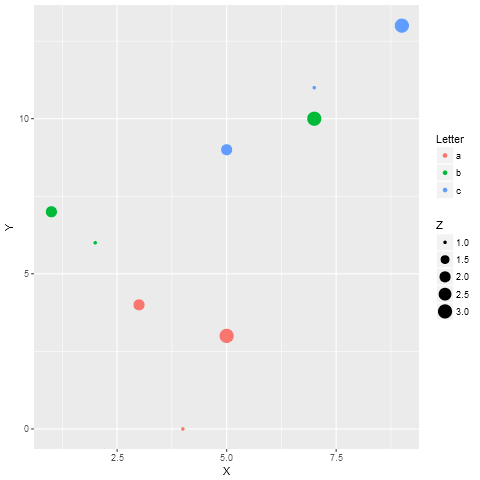

In [3]:
%%R -i df
ggplot(data=df) + geom_point(aes(x=X, y=Y, color=Letter, size=Z))

# 将dataframe写入不同文件中的小方法

In [4]:
import pandas as pd
import numpy as np
for i in range(3):
    data = pd.DataFrame(np.random.randn(10, 4))
    data.to_csv('file_{}.csv'.format(i))

# 读取多个文件创建单个dataframe

In [5]:
import glob

**glob模块是python中类似Unix风格的路径名模式扩展，可以很方便的获取文件名或路径名**

[Python glob模块 文档](https://docs.python.org/3/library/glob.html)

In [9]:
files = glob.glob('file_*.csv')
result = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)
result.head()

,Unnamed: 0,0,1,2,3
0,0,-0.838949,-1.019571,0.300255,1.724512
1,1,-0.780209,-0.173164,1.417021,-0.684636
2,2,-0.399404,0.390385,-0.783865,-2.792104
3,3,0.067128,0.798428,-1.017778,0.539681
4,4,-0.925932,0.785599,-0.564540,1.057666


In [7]:
#删除第一列的内容
result.drop(['Unnamed: 0'], axis=1, inplace=True)

In [10]:
result.head()

,Unnamed: 0,0,1,2,3
0,0,-0.838949,-1.019571,0.300255,1.724512
1,1,-0.780209,-0.173164,1.417021,-0.684636
2,2,-0.399404,0.390385,-0.783865,-2.792104
3,3,0.067128,0.798428,-1.017778,0.539681
4,4,-0.925932,0.785599,-0.564540,1.057666
